# Key Infrastructre Projects Across Communities in Ontario

Sarah Jafari


## **Introduction and Motivation** 

In recent years, the allocation of resources to infrastructure projects within communities plays a huge role in shaping the quality of life and well-being of residents. In Ontario, investments in key sectors such as education and healthcare are fundamental components of infrastructure development strategies, aiming to increase access to essential services and create community success. Understanding the strategies and priorities underlying investments in educational and healthcare infrastructure is critical for policymakers, stakeholders, and community members alike, as it offers insights into the broader dynamics of resource allocation and decision-making within Ontario communities.

The motivation for this study comes from the importance to gain a deeper understanding of the strategies and priorities driving investments in educational and healthcare infrastructure within Ontario communities. By examining the comparative investment patterns and resource allocation strategies between these two critical sectors, we aim to explain the subtle dynamics shaping infrastructure development initiatives and their implications for community outcomes. The exploration of potential correlations between investment levels and community characteristics seeks to inform evidence-based decision-making, policy formulation, and strategic planning processes, ultimately creating more equitable and sustainable development across Ontario communities.

## **Meaningful Question:**
How do the strategies and priorities differ between investments in educational and healthcare infrastructure?
Is there a correlation between the level of investment and the type of community or region?


## **Dataset Description:**
The "Ontario Builds: Key Infrastructure Projects in Communities" dataset provides information on infrastructure projects undertaken within communities across Ontario. These projects encompass various sectors, including education, and healthcare which we will be focusing on more. The dataset offers insights into the scope, status, funding sources, and geographical distribution of infrastructure investments aimed at enhancing community development and well-being



In [1]:
import pandas as pd
#%pip install nltk
%pip install seaborn

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Processing 'Communities' Dataset:

In [2]:
communities = pd.read_csv("C:\\Users\\Owner\\Downloads\\36f92c5b-0c8b-4a4b-b4c5-d15a43894297.csv")

#identifying a threshold for null values - 50%
threshold = len(communities) * 0.5
# Identify columns to drop based on threshold
columns_to_drop = communities.columns[communities.isnull().sum() > threshold].tolist()

# Drop these columns
communities.drop(columns=columns_to_drop, inplace=True)

#convert 'Target Completion Date' to datetime
communities['Target Completion Date'] = pd.to_datetime(communities['Target Completion Date'], errors='coerce')

#change Estimated budget to float
communities['Estimated Total Budget'] = communities['Estimated Total Budget'].replace('[\$,]', '', regex=True).astype(int)
    
#change long and lat to float
communities['Latitude'] = pd.to_numeric(communities['Latitude'], errors='coerce')
communities['Longitude'] = pd.to_numeric(communities['Longitude'], errors='coerce')

# Convert categorical variables to 'category' dtype
for col in ['Category', 'Supporting Ministry', 'Status']:
    communities[col] = communities[col].astype('category')
    
#clean text columns from noise
communities['Project'] = communities['Project'].str.replace('[^\w\s]', '', regex=True)
communities['Description'] = communities['Description'].str.replace('[^\w\s]', '', regex=True)
communities['Result'] = communities['Result'].str.replace('[^\w\s]', '', regex=True)

#check and remove duplicates
duplicates = communities.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    communities.drop_duplicates(inplace=True)
    
# Feature Engineering: Extract year from 'Target Completion Date'
communities['Year'] = communities['Target Completion Date'].dt.year

# Extract year from 'Target Completion Date', converting NaNs to a temporary placeholder
communities['Year'] = communities['Target Completion Date'].dt.year.fillna(0).astype(int)

# Categorical Data Exploration: Explore the distribution of categorical data
for col in ['Category', 'Supporting Ministry', 'Status']:
    print(communities[col].value_counts())
    
#classify regions into Rural and Urban, for analysis purposes
urban_regions = ['Central']
rural_regions = ['East', 'Northwest', 'Northeast', 'Southwest']
# Function to classify based on region
def classify_by_region(region):
    if region in urban_regions:
        return 'Urban'
    elif region in rural_regions:
        return 'Rural'
    else:
        return 'Unknown'   
# Apply classification
communities['Type'] = communities['Region'].apply(classify_by_region)

#The following is code to clean stopwords from text columns
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and return the cleaned text
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Assuming 'education' is your DataFrame and 'Description' is the column to clean
communities['Cleaned Description'] = communities['Description'].astype(str).apply(remove_stopwords)
communities['Cleaned Result'] = communities['Result'].astype(str).apply(remove_stopwords)
communities['Cleaned Project'] = communities['Project'].astype(str).apply(remove_stopwords)

# Check the first few entries of the cleaned column
print(communities[['Description', 'Cleaned Description']].head())

communities.drop(['Description', 'Result', 'Project'], axis=1, inplace=True)
communities.rename(columns={'Cleaned Description': 'Description', 'Cleaned Project': 'Project', 'Cleaned Result': 'Result'}, inplace=True)

communities = communities[communities['Type'] != 'Unknown']

#confirm changes
communities.info()
communities.head()


C:\Users\Owner\AppData\Local\Temp\ipykernel_1820\1087107896.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  communities['Target Completion Date'] = pd.to_datetime(communities['Target Completion Date'], errors='coerce')


Number of duplicate rows: 0
Category
Communities    2111
Name: count, dtype: int64
Supporting Ministry
Infrastructure                             1491
Municipal Affairs and Housing               253
Tourism, Culture and Sport                  170
Northern Development                        138
Children, Community and Social Services      37
Transportation                               13
Attorney General                              4
Environment, Conservation and Parks           3
Solicitor General                             2
Natural Resources and Forestry                1
Name: count, dtype: int64
Status
Complete              1944
Planning                93
Under construction      74
Name: count, dtype: int64
                                         Description  \
0                     Plan to replace old courthouse   
1             Renovating building at 25 Grosvenor St   
2                          New provincial courthouse   
3  Renovation of existing courthouse at 2201 Finc... 

,_id,Category,Supporting Ministry,Community,Status,Target Completion Date,Area,Region,Address,Postal Code,...,Municipal Funding,Provincial Funding,Federal Funding,Latitude,Longitude,Year,Type,Description,Result,Project
0,1,Communities,Attorney General,Peterborough,Complete,2017-11-01,Peterborough,East,NaN,NaN,...,NaN,Yes,NaN,44.304996,-78.326160,2017,Rural,Plan replace old courthouse,Plan inform future Ontario Court Justice Super...,Planning new courthouse Peterborough
1,2,Communities,Attorney General,Toronto,Complete,2019-07-01,Toronto,Central,25 Grosvenor St,NaN,...,NaN,Yes,NaN,43.662665,-79.385172,2019,Urban,Renovating building 25 Grosvenor St,Centralized Tribunal operations reduce energy ...,Moving Torontobased Attorney General agencies ...
2,3,Communities,Attorney General,Toronto,Complete,2023-01-01,Toronto,Central,10 Armoury St,NaN,...,NaN,Yes,NaN,43.653618,-79.386200,2023,Urban,New provincial courthouse,Improved justice services Torontonians stateof...,New courthouse Toronto
3,4,Communities,Attorney General,Toronto,Complete,2022-12-01,Toronto,Central,2201 Finch Ave. W.,M9M 2Y9,...,NaN,Yes,NaN,43.752606,-79.536505,2022,Urban,Renovation existing courthouse 2201 Finch Ave ...,Accommodation bail program associated new Toro...,Toronto Region Bail Centre
4,5,Communities,"Children, Community and Social Services",Ajax,Under construction,2024-08-01,Durham,Central,1461 Harwood Ave North,L1T 4T9,...,NaN,Yes,Yes,43.879000,-79.030000,2024,Urban,New construction childrens treatment centre Ajax,The new centre create treatment spaces shorter...,Grandview Childrens Centre


## Processing 'Education' Dataset:

In [3]:
education = pd.read_csv("C:\\Users\\Owner\\Downloads\\09cd6932-ec1a-44ce-9417-8dbaebbaaf02.csv")

# Identifying a threshold for null values - 50%
threshold = len(education) * 0.5
# Identify columns to drop based on threshold
columns_to_drop = education.columns[education.isnull().sum() > threshold].tolist()

# Drop these columns
education.drop(columns=columns_to_drop, inplace=True)

# Convert 'Target Completion Date' to datetime
education['Target Completion Date'] = pd.to_datetime(education['Target Completion Date'], errors='coerce')

# Change Estimated budget to float
education['Estimated Total Budget'] = education['Estimated Total Budget'].replace('[\$,]', '', regex=True).astype(int)
    
# Change longitude and latitude to float
education['Latitude'] = pd.to_numeric(education['Latitude'], errors='coerce')
education['Longitude'] = pd.to_numeric(education['Longitude'], errors='coerce')

# Convert categorical variables to 'category' dtype
for col in ['Category', 'Supporting Ministry', 'Status']:
    education[col] = education[col].astype('category')
    
# Clean text columns from noise
education['Project'] = education['Project'].str.replace('[^\w\s]', '', regex=True)
education['Description'] = education['Description'].str.replace('[^\w\s]', '', regex=True)
education['Result'] = education['Result'].str.replace('[^\w\s]', '', regex=True)

# Check and remove duplicates
duplicates = education.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    education.drop_duplicates(inplace=True)
    
# Feature Engineering: Extract year from 'Target Completion Date'
education['Year'] = education['Target Completion Date'].dt.year.fillna(0).astype(int)

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and return the cleaned text
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply cleaning function
education['Cleaned Description'] = education['Description'].astype(str).apply(remove_stopwords)
education['Cleaned Result'] = education['Result'].astype(str).apply(remove_stopwords)
education['Cleaned Project'] = education['Project'].astype(str).apply(remove_stopwords)

# Drop the original 'Description', 'Result', 'Project' columns
education.drop(['Description', 'Result', 'Project'], axis=1, inplace=True)

# Rename cleaned columns
education.rename(columns={'Cleaned Description': 'Description', 'Cleaned Project': 'Project', 'Cleaned Result': 'Result'}, inplace=True)

#classify regions into Rural and Urban, for analysis purposes
urban_regions = ['Central']
rural_regions = ['East', 'Northwest', 'Northeast', 'Southwest']
# Function to classify based on region
def classify_by_region(region):
    if region in urban_regions:
        return 'Urban'
    elif region in rural_regions:
        return 'Rural'
    else:
        return 'Unknown'   
# Apply classification
education['Type'] = education['Region'].apply(classify_by_region)

education.info()
education.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1820\213129669.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  education['Target Completion Date'] = pd.to_datetime(education['Target Completion Date'], errors='coerce')


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     766 non-null    int64         
 1   Category                765 non-null    category      
 2   Supporting Ministry     766 non-null    category      
 3   Community               755 non-null    object        
 4   Status                  765 non-null    category      
 5   Target Completion Date  765 non-null    datetime64[ns]
 6   Area                    754 non-null    object        
 7   Region                  755 non-null    object        
 8   Address                 765 non-null    object        
 9   Postal Code             722 non-null    object        
 10  Estimated Total Budget  766 non-null    int32         
 11  Provincial Funding      727 non-null    object        
 12  Other Funding         

,_id,Category,Supporting Ministry,Community,Status,Target Completion Date,Area,Region,Address,Postal Code,Estimated Total Budget,Provincial Funding,Other Funding,Latitude,Longitude,Year,Description,Result,Project,Type
0,1,Education,Colleges and Universities,Barrie,Complete,2018-10-01,Simcoe,Central,1 Georgian Dr,L4M 3X9,27700000,Yes,Yes,44.412167,-79.668206,2018,Modernizing facilities,Adding 60000 sq ft support engineering labs mu...,Georgian College Advanced Technology Innovatio...,Urban
1,2,Education,Colleges and Universities,Belleville,Complete,2018-04-01,Hastings,East,376 Wallbridge-Loyalist,K8N 5B9,3200000,Yes,Yes,44.177000,-77.389367,2018,Renovation existing space new Health Wellness ...,Upgrades building shell systems improve learni...,Loyalist College Health Wellness Centre Renova...,Rural
2,3,Education,Colleges and Universities,Greater Sudbury,Complete,2018-04-01,Sudbury,Northeast,935 Ramsey Lake Rd,P3E 2C6,60700000,Yes,Yes,46.466651,-80.974417,2018,Renovating expanding campus,Adding 47000 sqft space research innovation co...,Laurentian University Campus Modernization,Rural
3,4,Education,Colleges and Universities,Greater Sudbury,Complete,2016-09-01,Sudbury,Northeast,85 Elm St,P3C 1T3,0,Yes,Yes,46.493067,-80.996585,2016,Construction new building renovation CP Rail C...,Adding 2storeys renovated space support teachi...,Laurentian University New McEwen School Archit...,Rural
4,5,Education,Colleges and Universities,Guelph,Complete,2021-03-01,Wellington,Southwest,50 Stone Rd E,N1G 2W1,37650000,Yes,Yes,43.528436,-80.223520,2021,Renovation expansion,Larger teaching classrooms clinical research s...,University Guelph Investing Future Health Vete...,Rural


## Processing 'Healthcare' Dataset:

In [4]:
healthcare = pd.read_csv("C:\\Users\\Owner\\Downloads\\9312d8f7-9335-46dd-adde-c7665a0503b4.csv")

# Identifying a threshold for null values - 50%
threshold = len(healthcare) * 0.5
# Identify columns to drop based on threshold
columns_to_drop = healthcare.columns[healthcare.isnull().sum() > threshold].tolist()

# Drop these columns
healthcare.drop(columns=columns_to_drop, inplace=True)

# Convert 'Target Completion Date' to datetime
healthcare['Target Completion Date'] = pd.to_datetime(healthcare['Target Completion Date'], errors='coerce')

#change Estimated Total Budget TO int
healthcare['Estimated Total Budget'] = (
    pd.to_numeric(
        healthcare['Estimated Total Budget'].replace('[\$,]', '', regex=True),
        errors='coerce'  # Coerce errors to NaN
    )
).astype('int64')  # Then convert to Int64

# Change longitude and latitude to float
healthcare['Latitude'] = pd.to_numeric(healthcare['Latitude'], errors='coerce')
healthcare['Longitude'] = pd.to_numeric(healthcare['Longitude'], errors='coerce')

# Convert categorical variables to 'category' dtype
for col in ['Category', 'Supporting Ministry', 'Status']:
    healthcare[col] = healthcare[col].astype('category')
    
# Clean text columns from noise
healthcare['Project'] = healthcare['Project'].str.replace('[^\w\s]', '', regex=True)
healthcare['Description'] = healthcare['Description'].str.replace('[^\w\s]', '', regex=True)
healthcare['Result'] = healthcare['Result'].str.replace('[^\w\s]', '', regex=True)

# Check and remove duplicates
duplicates = healthcare.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    healthcare.drop_duplicates(inplace=True)
    
# Feature Engineering: Extract year from 'Target Completion Date'
healthcare['Year'] = healthcare['Target Completion Date'].dt.year.fillna(0).astype(int)

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and return the cleaned text
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply cleaning function
healthcare['Cleaned Description'] = healthcare['Description'].astype(str).apply(remove_stopwords)
healthcare['Cleaned Result'] = healthcare['Result'].astype(str).apply(remove_stopwords)
healthcare['Cleaned Project'] = healthcare['Project'].astype(str).apply(remove_stopwords)

# Drop the original 'Description', 'Result', 'Project' columns
healthcare.drop(['Description', 'Result', 'Project'], axis=1, inplace=True)

# Rename cleaned columns
healthcare.rename(columns={'Cleaned Description': 'Description', 'Cleaned Project': 'Project', 'Cleaned Result': 'Result'}, inplace=True)

# Classify regions into Rural and Urban, for analysis purposes
urban_regions = ['Central']
rural_regions = ['East', 'Northwest', 'Northeast', 'Southwest']
# Function to classify based on region
def classify_by_region(region):
    if region in urban_regions:
        return 'Urban'
    elif region in rural_regions:
        return 'Rural'
    else:
        return 'Unknown'
# Apply classification
healthcare['Type'] = healthcare['Region'].apply(classify_by_region)

# Check the final DataFrame structure
healthcare.info()
healthcare.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1820\1369286764.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  healthcare['Target Completion Date'] = pd.to_datetime(healthcare['Target Completion Date'], errors='coerce')


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     107 non-null    int64         
 1   Category                106 non-null    category      
 2   Supporting Ministry     107 non-null    category      
 3   Community               106 non-null    object        
 4   Status                  106 non-null    category      
 5   Target Completion Date  106 non-null    datetime64[ns]
 6   Area                    106 non-null    object        
 7   Region                  106 non-null    object        
 8   Address                 106 non-null    object        
 9   Postal Code             106 non-null    object        
 10  Estimated Total Budget  107 non-null    int64         
 11  Provincial Funding      106 non-null    object        
 12  Other Funding         

,_id,Category,Supporting Ministry,Community,Status,Target Completion Date,Area,Region,Address,Postal Code,Estimated Total Budget,Provincial Funding,Other Funding,Latitude,Longitude,Year,Description,Result,Project,Type
0,1,Health care,Health,Atikokan,Complete,2017-07-01,Rainy River,Northwest,120 Dorothy St,P0T 1C0,0,Yes,Yes,48.753595,-91.598441,2017,Renovating roughly 8500 sq ft adding roughly 1...,More space 11 acutecare types beds well improv...,Atikokan General Hospital Renovation Expansion,Rural
1,2,Health care,Health,Barrie,Complete,2013-08-01,Simcoe,Central,201 Georgian Dr,L4M 6M2,372605793,Yes,Yes,44.415046,-79.662803,2013,Construction 4 bunker3 machines Simcoe Muskoka...,An additional 101 inpatient beds expanded emer...,The Royal Victoria Hospital Barrie Phase 1 Red...,Urban
2,3,Health care,Health,Belleville,Complete,2017-02-01,Hastings,East,265 Dundas Street East,K8N 5A9,0,Yes,Yes,44.162698,-77.364334,2017,Renovations medical device reprocessing depart...,Improved infection control enhanced preventive...,Quinte Healthcare Corporation Renovation,Rural
3,4,Health care,Health,Blind River,Complete,2015-03-01,Algoma,Northeast,473 ON-17,P0P 1B0,609200,Yes,NaN,46.187155,-82.924852,2015,Construct satellite building adjacent existing...,Additional file storage meeting space Cutler,Anishnawbe Mushkiki AHAC NMninoeayaa AHAC Site,Rural
4,5,Health care,Health,Bradford-West Gwillimbury,Under construction,2026-03-01,Simcoe,Central,200 Terrace Hill St.,N3R 1G9,28376900,Yes,Yes,43.153080,-80.276169,2026,Th Emergency Department Expansion Project incl...,Reduce ED wait times service improvements addr...,Brant Community Healthcare System Emergency De...,Urban


## Merging 'Education' and 'Healthcare' Dataframes into One

In [5]:
columns = ['Category', 'Community', 'Status', 'Year', 
           'Region', 'Type', 'Estimated Total Budget', 'Provincial Funding', 
           'Other Funding', 'Project', 'Description', 'Result']

# Subset the dataframes to include only the required columns
education1 = education[columns]
healthcare1 = healthcare[columns]

merged_df = pd.concat([education1, healthcare1], ignore_index=True, sort=False)
merged_df.sort_values(by='Community', inplace=True)

merged_df['Provincial Funding'].fillna('No', inplace=True)
merged_df['Other Funding'].fillna('No', inplace=True)

merged_df = merged_df[merged_df['Type'] != 'Unknown']

merged_df.head()
merged_df.sample(10)

C:\Users\Owner\AppData\Local\Temp\ipykernel_1820\1357176704.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Provincial Funding'].fillna('No', inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_1820\1357176704.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

,Category,Community,Status,Year,Region,Type,Estimated Total Budget,Provincial Funding,Other Funding,Project,Description,Result
775,Health care,Burlington,Complete,2018,Central,Urban,0,Yes,Yes,Joseph Brant Hospital Renovation Expansion,Construction new tower renovations existing bu...,7storey 414920 sq fttower 128225 sq ft renovat...
162,Education,Collingwood,Complete,2016,Central,Urban,6035644,Yes,No,École élémentaire catholique NotreDamedelaHuronie,New school built,New facility accommodate 200 underserved Frenc...
353,Education,Milton,Complete,2019,Central,Urban,10134298,Yes,No,École élémentaire publique DyaneAdam,Construction new school,New facility accommodate 354 underserved Frenc...
245,Education,Hamilton,Complete,2018,Central,Urban,408859,Yes,No,Eastdale Public Elementary School,Fullpartial demolition existing facility,nan
411,Education,Oakville,Complete,2021,Central,Urban,3122284,Yes,No,St Michael Catholic Elementary School,Expansion existing school,New classroom addition 23 pupil places accommo...
451,Education,Ottawa,Complete,2016,East,Rural,9867655,Yes,No,St Benedict Catholic Elementary School,New school built,New facility accommodate 507 students growing ...
273,Education,"Killaloe, Hagarty and Richards",Complete,2015,East,Rural,582983,Yes,No,St Andrews Catholic Elementary School,Renovation existing school,School renovation address accommodation needs ...
644,Education,Toronto,Complete,2015,Central,Urban,956956,Yes,No,Avondale Public Elementary School,Demolition,FullPartial demolition existing facility
49,Education,Waterloo,Complete,2016,Southwest,Rural,72600000,Yes,Yes,Wilfrid Laurier University Centre Global Innov...,Construction new building,215000 sq ftfacility 7 lecture halls 2level110...
838,Health care,Toronto,Complete,2017,Central,Urban,28598567,Yes,Yes,The Salvation Army Toronto Grace Health Centre...,Upgrades 70000 sq ft TGHC renovations 50000 sq...,Improvements air quality patients staff safety...


## Visualizations:


## **Visualization 1 Analysis:**

The "Total Investment by Community Type" bar chart compares the total investment in two types of communities, rural and urban. The y-axis represents the total investment in billions of dollars and the x-axis classifies the investments into two bars, “Rural” and “Urban” communities. From this visualization, it is clear that there is a large difference between funding for both types of communities, with Urban communities receiving more than double the amount of funding Rural communities receive. This is most likely due to the higher population density and economic activity in urban areas when compared to rural. Thus, the chart does suggest a correlation between the level of investment and the type of community or region, as urban communities are receiving a larger investment.


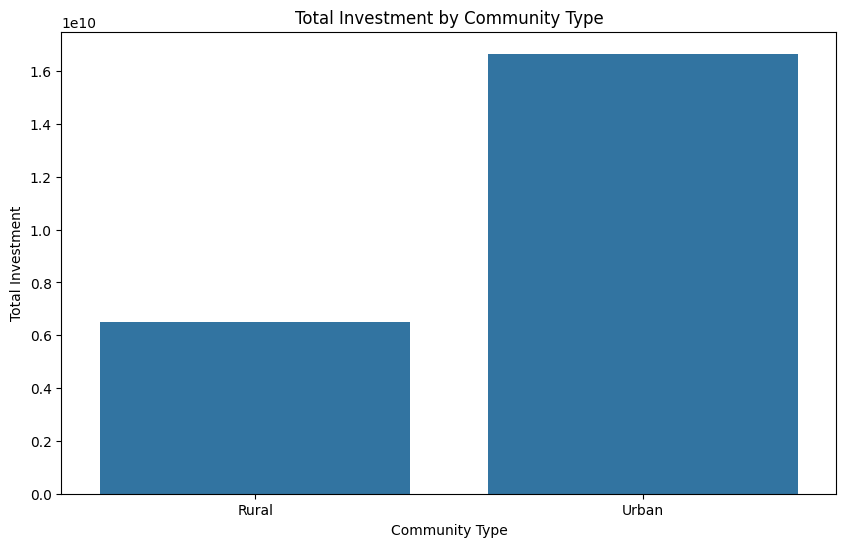

In [7]:
investment_by_type = merged_df.groupby('Type')['Estimated Total Budget'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Estimated Total Budget', data=investment_by_type)
plt.title('Total Investment by Community Type')
plt.xlabel('Community Type')
plt.ylabel('Total Investment')
plt.show()

## **Visualization 2 Analysis:**
The "Total Investment by Category and Community Type" grouped bar chart does a financial comparison in the Education and Healthcare categories. The y-axis represents the total investment in billions of dollars, with the x-axis representing the investment category. There are also two bars for each category, with orange representing rural and blue representing urban communities. From this visualization, there is a discrepancy in where funding is allocated based on community types. Education in rural and urban areas are similar but rural funding is still a bit more. For healthcare, investments in urban communities are more than double the amount received by rural communities. The error bars also display that the actual investment values may differ within the indicated ranges. The chart clearly shows a distinction in investment priorities based on community type. While education investments are relatively even, healthcare investments favour urban areas. This could be due to population density and access to resources. It also reveals that the type of community correlates with the level of investment in healthcare significantly, but less in education.

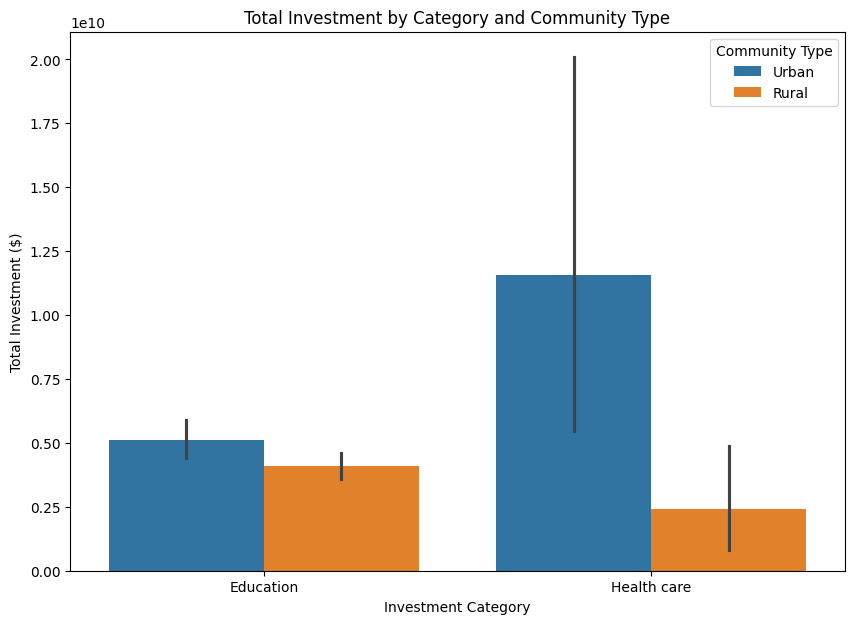

In [9]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Category', y='Estimated Total Budget', hue='Type', data=merged_df, estimator=sum)

# Title and labels
plt.title('Total Investment by Category and Community Type')
plt.xlabel('Investment Category')
plt.ylabel('Total Investment ($)')
plt.legend(title='Community Type')

# Show the plot
plt.show()

## **Visualization 3 Analysis:**
The "Comparison of Funding Types Received by Education and Healthcare" stacked bar chart compares the number of projects funded in two Education and Healthcare. Each category has two segments in its bar with the lower segment in blue representing "Provincial Funding" and the upper segment in orange representing "Other Funding”. In the Education category, the total number of funded projects is just over 1000 and in the Healthcare category the total number of funded projects is around 500. Thus, the number of education projects funded is double that of healthcare projects. Education projects also receive a greater mix of funding sources, with "Provincial Funding" surpassing "Other Funding". The education category may have more varied support from private, federal, or international sources, in addition to provincial support. Overall, the visualization suggests a correlation between the funding type and the category receiving the investment. This could reflect the priorities of those providing funding or the need for diversifying funding sources in education compared to healthcare.

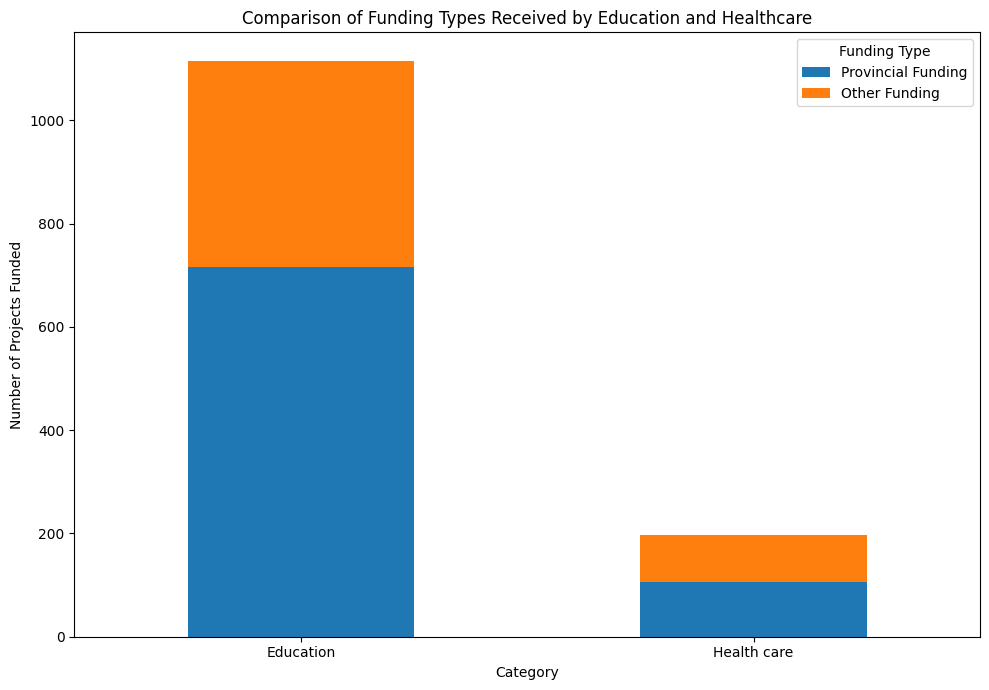

In [10]:
# First, create a simplified column for funding type presence (Yes/No to 1/0)
merged_df['Provincial Funding'] = merged_df['Provincial Funding'].apply(lambda x: 1 if x == 'Yes' else 0)
merged_df['Other Funding'] = merged_df['Other Funding'].apply(lambda x: 1 if x == 'Yes' else 0)

# Now, group by Category and sum the funding types
funding_by_category = merged_df.groupby('Category')[['Provincial Funding', 'Other Funding']].sum()

# Create a stacked bar chart
funding_by_category.plot(kind='bar', stacked=True, figsize=(10, 7))

# Title and labels
plt.title('Comparison of Funding Types Received by Education and Healthcare')
plt.xlabel('Category')
plt.ylabel('Number of Projects Funded')
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.legend(title='Funding Type', labels=['Provincial Funding', 'Other Funding'])

# Display the plot
plt.tight_layout()
plt.show()

## **Visualization 4 Analysis:**
The "Average Investment by Category and Community Type" grouped bar chart compares the average investment in dollars across Education and Healthcare, with blue representing rural and orange representing urban community types. The y-axis represents the average investment with the x-axis representing the category type. The disparity in investment is much more pronounced in the healthcare sector than in education, with urban healthcare receiving a vastly greater average investment.
This might suggest that urban healthcare facilities or projects receive more funds on average, which could be due to higher costs of urban healthcare infrastructure, higher population density, or general prioritization. There is a huge contrast in the average investment between urban and rural communities, especially in health care. This signifies a strong correlation between the type of community and the level of investment received. 

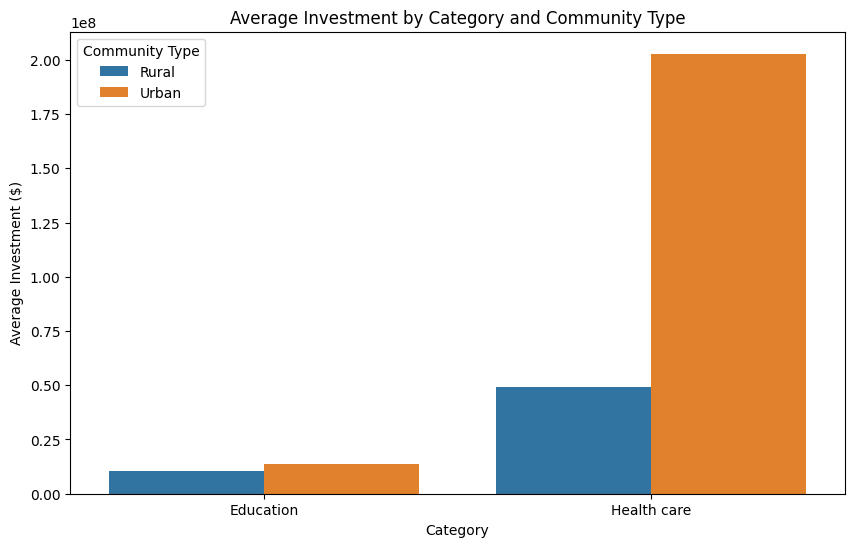

In [11]:
import numpy as np
average_investment = merged_df.groupby(['Category', 'Type'])['Estimated Total Budget'].mean().reset_index()

# Plotting the average investment
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Estimated Total Budget', hue='Type', data=average_investment, estimator=np.mean)
plt.title('Average Investment by Category and Community Type')
plt.xlabel('Category')
plt.ylabel('Average Investment ($)')
plt.legend(title='Community Type')
plt.show()

## **Visualization 5 Analysis:**
The "Change in Funding Priorities Over the Years" line chart plots the total estimated budget in billions of dollars, indicated on the y-axis, against years from 2014 to 2028, indicated on the x-axis. Two lines represent the funding trends with blue for rural and orange for urban communities. The rural funding line shows fluctuations over the years with peaks around 2019 and 2024. The urban funding line also displays peaks around 2015 and 2023. Furthermore, both rural and urban funding have experienced significant fluctuations over time. The sharp rise in the rural funding line projected for 2027 may indicate planned future investments favouring rural communities. The line chart suggests there are changes in funding priorities over time for both community types. Peaks in funding might correspond to economic cycles, policy changes, large-scale projects, or responses to particular societal needs.


<Figure size 1200x600 with 0 Axes>

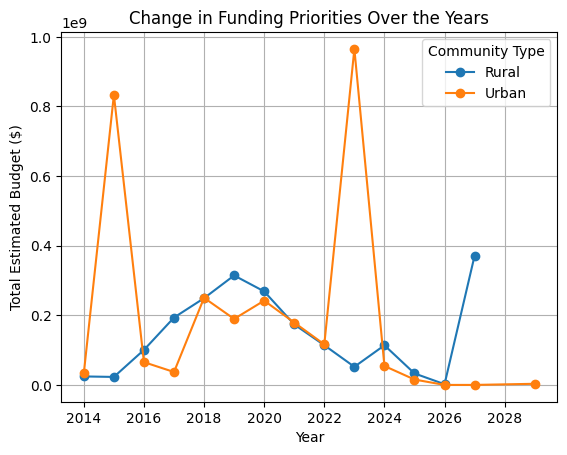

In [12]:
valid_years = communities[(communities['Year'] > 2000)]

# Now group by 'Year' and 'Type', and get the sum of 'Estimated Total Budget' for each group
funding_by_year_type = valid_years.groupby(['Year', 'Type'])['Estimated Total Budget'].sum().unstack()

# Plot the corrected data
plt.figure(figsize=(12, 6))
funding_by_year_type.plot(kind='line', marker='o')
plt.title('Change in Funding Priorities Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Estimated Budget ($)')
plt.legend(title='Community Type')
plt.grid(True)
plt.show()

## **Conclusion:**

In this study, we conducted a comparative analysis of investments in educational and healthcare infrastructure within Ontario rural and urban communities, aiming to uncover insights into the strategies, priorities, and underlying dynamics shaping resource allocation in these areas. Through the examination of a comprehensive dataset of infrastructure projects, we sought to make the subtle differences in investment patterns and their implications for community outcomes, as well as explore potential correlations between investment levels and community characteristics.

In conclusion, our study provides valuable insights into the strategies, priorities, and correlations underlying investments in educational and healthcare infrastructure within Ontario communities. By creating a deeper understanding of these dynamics, we aim to contribute to informed decision-making, equitable development, and sustainable community outcomes, ultimately advancing the well-being and success of residents across communities.